In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../cleaned_dataset_without_na.csv', delimiter='|')
data.head()

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,4-6,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
1,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
2,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
3,"Wyjątkowe mieszkanie w centrum Gdyni, blisko l...",101.58,4.0,4-6,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
4,Mieszkanie w świetnej lokalizacji Gdynia Dąbrowa,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Mieszkanie,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508


In [3]:
data = data.drop('title', axis=1)
threshold_low = 5000  # Set your threshold value here
threshold_high = 30000
data = data[data['price_for_m2_in_PLN'] >= threshold_low]
data = data[data['price_for_m2_in_PLN'] <= threshold_high]


In [4]:
data_numerical = data.drop(['city', 'district', 'type_of_market', 'type_of_building', 'floor', 'street'], axis=1)

In [5]:
A = data.drop(['price_for_m2_in_PLN', 'street'], axis=1)
b = data['price_for_m2_in_PLN']
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.2, random_state=0)

In [6]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preprocessor = ColumnTransformer([("cat", cat_pipeline, make_column_selector(dtype_include=object)),], remainder=num_pipeline)
preprocessor = preprocessor.fit(X_train, y_train)
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [7]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"One-Hot Encoding Model - Mean Squared Error: {mse}")

One-Hot Encoding Model - Mean Squared Error: 11555182.07551038


In [9]:
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", rmse)

RMSE:  3399.2914078540516


In [10]:
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmsle

0.2226996994943309

In [11]:
coefficients = model.coef_
feature_names = preprocessor.get_feature_names_out()
d = {feature_names[i]: coefficients[i] for i in range(len(feature_names))}
d

{'cat__floor_0': -360.4633495680937,
 'cat__floor_1-3': -361.72450999218273,
 'cat__floor_4-6': -562.6126104464112,
 'cat__floor_8+': 1284.8004700079107,
 'cat__type_of_market_primary': -886.7050984486643,
 'cat__type_of_market_secondary': 886.7050984579556,
 'cat__type_of_building_Dom': -1175.5952892064756,
 'cat__type_of_building_Mieszkanie': 1175.5952892065352,
 'cat__district_aniołki': 3093.6434559391346,
 'cat__district_babie doły': -3019.292717809314,
 'cat__district_brodwino': -3856.52792247177,
 'cat__district_brzeźno': 4273.4229655220615,
 'cat__district_brętowo': -447.2698596226107,
 'cat__district_chełm': -1809.2289096059965,
 'cat__district_chwarzno-wiczlino': -4158.917873329153,
 'cat__district_chylonia': -2444.55563687019,
 'cat__district_cisowa': -3486.8629163969686,
 'cat__district_dolny sopot': 5313.399260926214,
 'cat__district_działki leśne': 1194.4150623700914,
 'cat__district_dąbrowa': -1703.8521830255133,
 'cat__district_grabówek': -611.5192102107399,
 'cat__distr

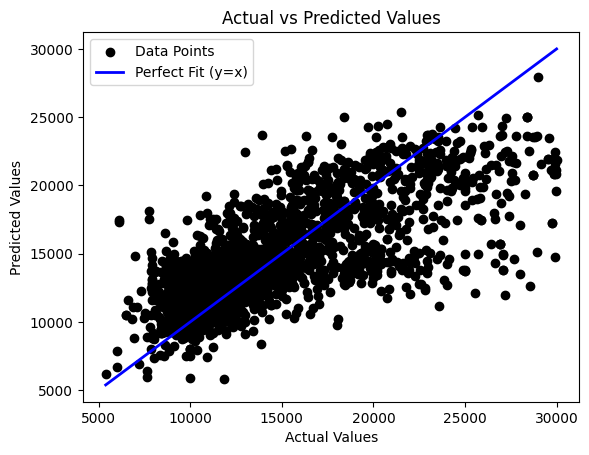

In [12]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [13]:
r2_lr = r2_score(y_test, y_pred)
r2_lr

0.522712066948386